In [53]:
import pyzx
from copy import deepcopy
import random
import inspect

## Circuit Generating Method

In [2]:
Circ1 = pyzx.generate.CNOT_HAD_PHASE_circuit(qubits=5, depth=20)
print(Circ1.stats())
print("\n", Circ1.__class__)
pyzx.draw(Circ1)

Circuit  on 5 qubits with 20 gates.
        5 is the T-count
        15 Cliffords among which
        15 2-qubit gates (15 CNOT, 0 other) and
        0 Hadamard gates.

 <class 'pyzx.circuit.Circuit'>


In [3]:
circ2 = pyzx.generate.cliffordT(qubits=5, depth=20)
print(circ2.stats())
print(circ2.__class__)
pyzx.draw_d3(circ2)

Graph(48 vertices, 51 edges)
degree distribution: 
1: 10
2: 22
3: 16

<class 'pyzx.graph.graph_s.GraphS'>


In [11]:
circ3 = pyzx.generate.cnots(qubits=5, depth=5)
print(circ3.stats())
print(circ3.__class__)

Graph(30 vertices, 30 edges)
degree distribution: 
1: 10
2: 10
3: 10

<class 'pyzx.graph.graph_s.GraphS'>


In [4]:
circ4 = pyzx.generate.phase_poly(n_qubits=5, n_phase_layers=5, cnots_per_layer=3)
print(circ4.stats())
print(circ4.__class__)
pyzx.draw(circ4)

Circuit  on 5 qubits with 40 gates.
        7 is the T-count
        33 Cliffords among which
        15 2-qubit gates (15 CNOT, 0 other) and
        0 Hadamard gates.
<class 'pyzx.routing.parity_maps.CNOT_tracker'>


## ZX-diagram -> Graph like ZX-diagram
1. to_gh
2. to_graph_like

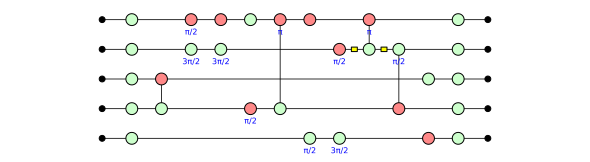

In [49]:
random.seed(50)
diagram = pyzx.generate.cliffords(qubits=5, depth=10)
pyzx.draw_matplotlib(g=diagram, h_edge_draw='box')

In [55]:
source_code_to_gh = inspect.getsource(pyzx.simplify.to_gh)
print(source_code_to_gh)

def to_gh(g: BaseGraph[VT,ET],quiet:bool=True) -> None:
    """Turns every red node into a green node by changing regular edges into hadamard edges"""
    ty = g.types()
    for v in g.vertices():
        if ty[v] == VertexType.X:
            g.set_type(v, VertexType.Z)
            for e in g.incident_edges(v):
                et = g.edge_type(e)
                g.set_edge_type(e, toggle_edge(et))



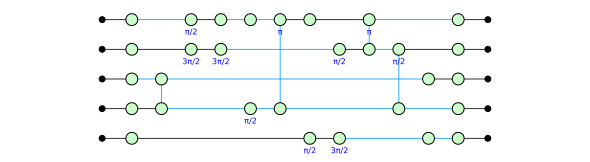

In [52]:
diagram1 = deepcopy(diagram)
pyzx.simplify.to_gh(diagram1)
pyzx.draw_matplotlib(diagram1, h_edge_draw="blue")

### Color Change だけで、graph_like の要件は満たしている気がするので、graph_like への transform は、to_gh を使いましょう。

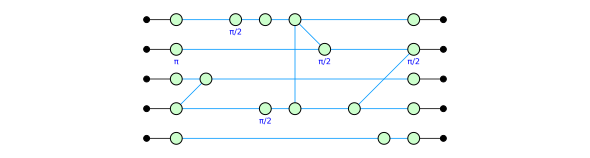

In [51]:
diagram2 = deepcopy(diagram)
pyzx.simplify.to_graph_like(diagram2)
diagram2.normalize()
pyzx.draw_matplotlib(diagram2)